In [13]:
import pandas as pd
from preprocessing import data_preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Read Data from CSV
df = pd.read_csv('reddit_sentiment.csv')

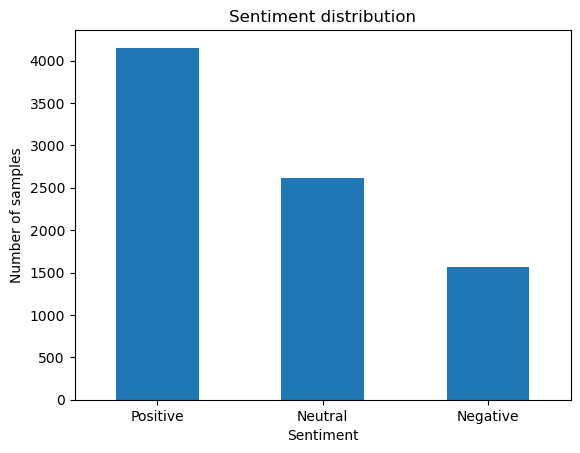

In [3]:
# Show the Data Distribution
sentiment_distribution = df['Sentiment_Label'].value_counts()
sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of samples')
plt.title('Sentiment distribution')
plt.xticks(rotation=0)
plt.show()


In [4]:
# Preprocess the data
df = data_preprocessing(df)

In [5]:
print(df.head())

                                                Body  Sentiment_Label
0  If you have a use case that you want to use AI...               -1
1  I'm really curious to know how many of you use...                1
2  Ben Buchanan was the top adviser on A.I. in th...                1
3  1. **Amazon’s** AWS forms new group focused on...               -1
4  If artificial intelligence is about "intellige...                1


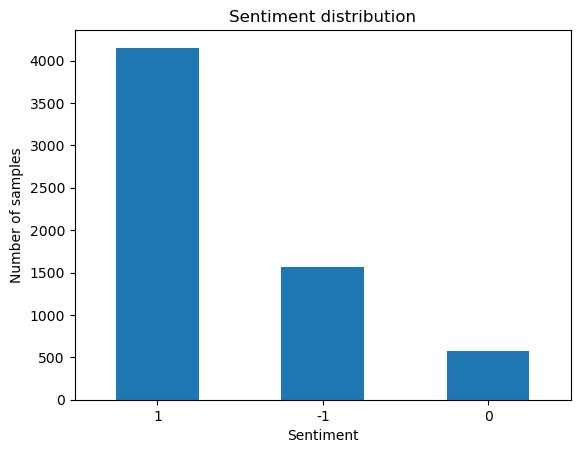

In [6]:
# Show the Data Distribution
sentiment_distribution = df['Sentiment_Label'].value_counts()
sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of samples')
plt.title('Sentiment distribution')
plt.xticks(rotation=0)
plt.show()


In [7]:
X = df['Body']
y = df['Sentiment_Label']

In [8]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['Body'], df['Sentiment_Label'], test_size=0.2, random_state=42, stratify=df['Sentiment_Label'], shuffle=True
)

In [9]:
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)


Training Data Shape: (5032,)
Testing Data Shape: (1258,)


# Vectorizer

In [10]:
# Vectorize the data
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 2))
X_count = vectorizer.fit_transform(X)
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [44]:
# cross validation for count vectorizer
from sklearn.model_selection import cross_validate
import numpy as np

model = SVC(kernel='linear', C = 1.0)
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(model, X_count, y, cv=skf, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.7009538950715422
Precision: 0.6104729834925482
Recall: 0.6246573547731542
F1: 0.616695310045899


In [48]:
print(scores['test_accuracy'])
print(scores['test_recall_macro'])

[0.6899841  0.72098569 0.70667727 0.67806041 0.709062  ]
[0.62939628 0.6434656  0.62413979 0.61237281 0.6139123 ]


In [46]:
# Train the model
model = SVC(kernel='linear', C=1)
model.fit(X_train_count, y_train)

SVC(C=1, kernel='linear')

Baseline Accuracy: 0.73
Confusion Matrix:
 [[173  22 118]
 [ 22  68  25]
 [113  43 674]]


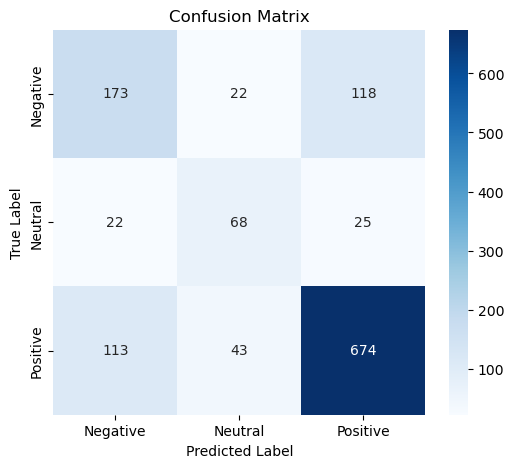

              precision    recall  f1-score   support

    Negative       0.56      0.55      0.56       313
     Neutral       0.51      0.59      0.55       115
    Positive       0.82      0.81      0.82       830

    accuracy                           0.73      1258
   macro avg       0.63      0.65      0.64      1258
weighted avg       0.73      0.73      0.73      1258



In [47]:
# Evaluate the model
y_pred = model.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)

print(f'Baseline Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))

---

In [11]:
# Vectorize the data
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [55]:
# cross validation for tfidf
model_tfidf = SVC(kernel='linear', C = 1.0)
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(model_tfidf, X_tfidf, y, cv=skf, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.7332273449920508
Precision: 0.6865768827254327
Recall: 0.5490138837724475
F1: 0.5848881617103194


In [51]:
print(scores['test_accuracy'])

[0.72893482 0.73449921 0.74483307 0.71224165 0.74562798]


---

In [56]:
import gensim.downloader as api

w2v_model = api.load("word2vec-google-news-300")  

print(w2v_model.most_similar("stock"))


[('shares', 0.7760441899299622), ('stocks', 0.6025431752204895), ('Shares', 0.5807890295982361), ('Stock', 0.5690754652023315), ('stockmarket', 0.5496109127998352), ('market_capitalization', 0.5441644191741943), ('VNDA', 0.5439260005950928), ('Autozone_NYSE_AZO', 0.5406639575958252), ('Insider_buying', 0.5401883125305176), ('shareprice', 0.5363472104072571)]


In [57]:
import numpy as np

def text_to_w2v(text, model=w2v_model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)  # 300 維向量

X_w2v = np.array([text_to_w2v(text) for text in X])
X_train_w2v = np.array([text_to_w2v(text) for text in X_train])
X_test_w2v = np.array([text_to_w2v(text) for text in X_test])


In [58]:
# cross validation for w2v
model_w2v = SVC(kernel='linear', C = 1.0)
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(model_w2v, X_w2v, y, cv=skf, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))


Accuracy: 0.7106518282988871
Precision: 0.7580433522842959
Recall: 0.46328287672751883
F1: 0.4896353976318954


Baseline Accuracy: 0.71
Confusion Matrix:
 [[ 52   2 259]
 [ 15  28  72]
 [ 11   1 818]]


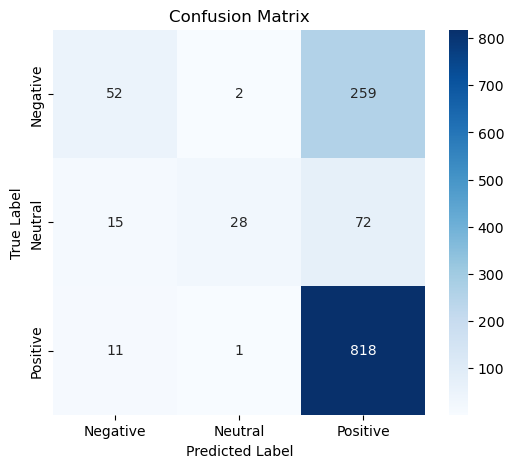

In [59]:
# confusion matrix for w2v
model_w2v = SVC(kernel='linear', C=1)
model_w2v.fit(X_train_w2v, y_train)

y_pred_w2v = model_w2v.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred_w2v)

print(f'Baseline Accuracy: {accuracy:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred_w2v)
print("Confusion Matrix:\n", conf_matrix)

labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Resampling


In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

model_ros = SVC(kernel='linear', C=1.0)
ros = RandomOverSampler(random_state=42, sampling_strategy={-1: 2500})
pipeline = Pipeline([
    ('oversample', ros),
    ('model', model_ros)
])
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_tfidf, y, cv=cv, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))


Accuracy: 0.7246422893481717
Precision: 0.6713567869226078
Recall: 0.5713169300474146
F1: 0.6011580516823216


In [15]:
from imblearn.over_sampling import SMOTE

model_smote = SVC(kernel='linear', C=1.0)
smote = SMOTE(random_state=42)
pipeline = Pipeline([
    ('smote', smote),
    ('model', model_smote)
])
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_tfidf, y, cv=cv, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.714785373608903
Precision: 0.6219042537374204
Recall: 0.6428882904511172
F1: 0.6309914407685371


In [17]:
from imblearn.under_sampling import RandomUnderSampler

model_rus = SVC(kernel='linear', C=1.0)
rus = RandomUnderSampler(random_state=42, sampling_strategy={1: 1800})
pipeline = Pipeline([
    ('undersample', rus),
    ('model', model_rus)
])
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_tfidf, y, cv=cv, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.712241653418124
Precision: 0.6299472188263713
Recall: 0.6208037236520616
F1: 0.6243567244402485


# Data Augmentation

In [18]:
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')

def synonym_replacement(text, n=2):
    if len(text) == 0: 
        return text
    words = text.split()
    if(len(words) == 0):
        return text
    new_words = words.copy()
    for _ in range(n):
        word_idx = random.randint(0, len(words)-1)
        synonyms = wordnet.synsets(words[word_idx])
        if synonyms:
            new_word = synonyms[random.randint(0, len(synonyms)-1)].lemmas()[0].name()
            new_words[word_idx] = new_word
    return " ".join(new_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhongbangjun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Augmented Accuracy: 0.71
Confusion Matrix:
 [[155  25 133]
 [ 19  69  27]
 [114  47 669]]


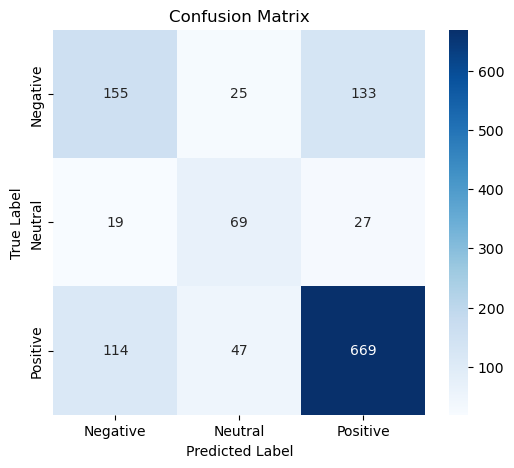

              precision    recall  f1-score   support

    Negative       0.54      0.50      0.52       313
     Neutral       0.49      0.60      0.54       115
    Positive       0.81      0.81      0.81       830

    accuracy                           0.71      1258
   macro avg       0.61      0.63      0.62      1258
weighted avg       0.71      0.71      0.71      1258



In [91]:
X_train_augmented = [synonym_replacement(text, n=50) for text in X_train]
X_train_augmented_tfidf = vectorizer.transform(X_train_augmented)
X_train_augmented_tfidf_smote, y_train_smote = smote.fit_resample(X_train_augmented_tfidf, y_train)
model_augmented_smote = SVC(kernel='linear', C=1.0)
model_augmented_smote.fit(X_train_augmented_tfidf_smote, y_train_smote)

y_pred = model_augmented_smote.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Augmented Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))
    